<a href="https://colab.research.google.com/github/Sruthy08/Data-Analytics-Project/blob/main/Weather_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Weather Data Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load the Dataset**

In [ ]:
df = pd.read_csv('weather.csv')  # if uploaded directly
df['Date'] = pd.to_datetime(df['Date'])  # convert to date type


**Explore the Data**

In [ ]:
print(df.head())

        Date  Temperature  Humidity  WindSpeed  Rainfall
0 2024-01-01         32.7        56       13.0      18.6
1 2024-01-02         25.1        86       17.1       7.6
2 2024-01-03         27.9        86       10.5      19.3
3 2024-01-04         20.6        81        6.6      18.0
4 2024-01-05         27.1        63       16.6       5.1


In [ ]:
print(df.describe())

                                Date  Temperature    Humidity   WindSpeed  \
count                            365   365.000000  365.000000  365.000000   
mean   2024-07-01 00:00:00.000000256    27.345753   65.342466   12.765479   
min              2024-01-01 00:00:00    20.000000   40.000000    5.000000   
25%              2024-04-01 00:00:00    23.500000   52.000000    8.800000   
50%              2024-07-01 00:00:00    27.600000   66.000000   13.100000   
75%              2024-09-30 00:00:00    30.700000   78.000000   16.300000   
max              2024-12-30 00:00:00    35.000000   90.000000   20.000000   
std                              NaN     4.351363   15.090222    4.318032   

         Rainfall  
count  365.000000  
mean     9.852603  
min      0.100000  
25%      4.900000  
50%      9.400000  
75%     14.900000  
max     19.900000  
std      5.803663  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Temperature  365 non-null    float64       
 2   Humidity     365 non-null    int64         
 3   WindSpeed    365 non-null    float64       
 4   Rainfall     365 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 14.4 KB
None


**Clean the Data**

In [ ]:
print(df.isnull().sum())

Date           0
Temperature    0
Humidity       0
WindSpeed      0
Rainfall       0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df_filtered = df[df['Temperature'] > 25]

In [ ]:
df

,Date,Temperature,Humidity,WindSpeed,Rainfall
0,2024-01-01,32.7,56,13.0,18.6
1,2024-01-02,25.1,86,17.1,7.6
2,2024-01-03,27.9,86,10.5,19.3
3,2024-01-04,20.6,81,6.6,18.0
4,2024-01-05,27.1,63,16.6,5.1
...,...,...,...,...,...
360,2024-12-26,30.9,54,17.0,12.3
361,2024-12-27,30.5,56,8.4,10.9
362,2024-12-28,29.7,69,14.6,16.3
363,2024-12-29,32.9,71,17.2,1.5


 **Visualization**

**1. Temperature over Time**

In [ ]:
import plotly.express as px

fig = px.line(df,
              x='Date',
              y='Temperature',
              title='Temperature Over Time',
              markers=True)  # show dots for each data point

# Match your original red line style
fig.update_traces(line_color='red')

# Axis labels & style
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Temperature (°C)',
    template='plotly_white'
)

fig.show()



**2. Correlation Heatmap**

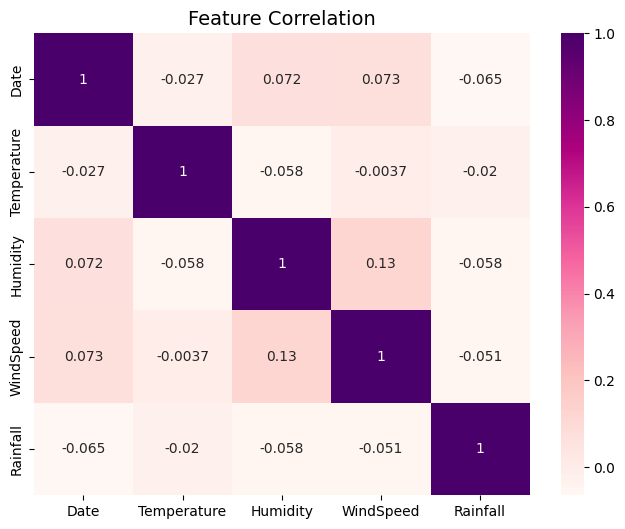

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='RdPu')  # Pink color palette
plt.title('Feature Correlation', fontsize=14)
plt.show()



**3. Rainfall Distribution**

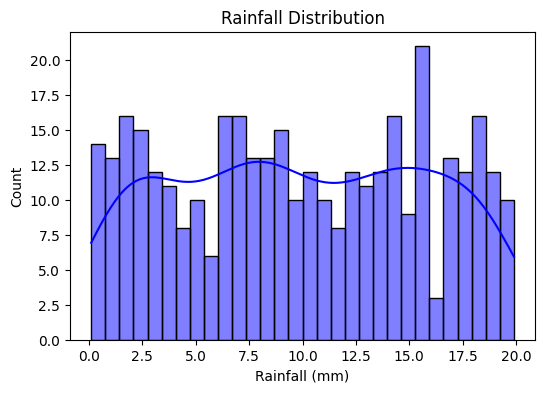

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rainfall'], bins=30, kde=True, color='blue')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.show()


**Machine Learning: Linear Regression**

**1. Select Features and Target**

In [ ]:
X = df[['Humidity', 'WindSpeed', 'Rainfall']]  # Features
y = df['Temperature']  # Target


**2. Split Data into Train & Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**3. Train Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**4. Predict**

In [ ]:
y_pred = model.predict(X_test)


**5. Check Accuracy**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 19.71908288897208
R² Score: -0.007865043495141277


**6. Visualization: Actual vs Predicted**

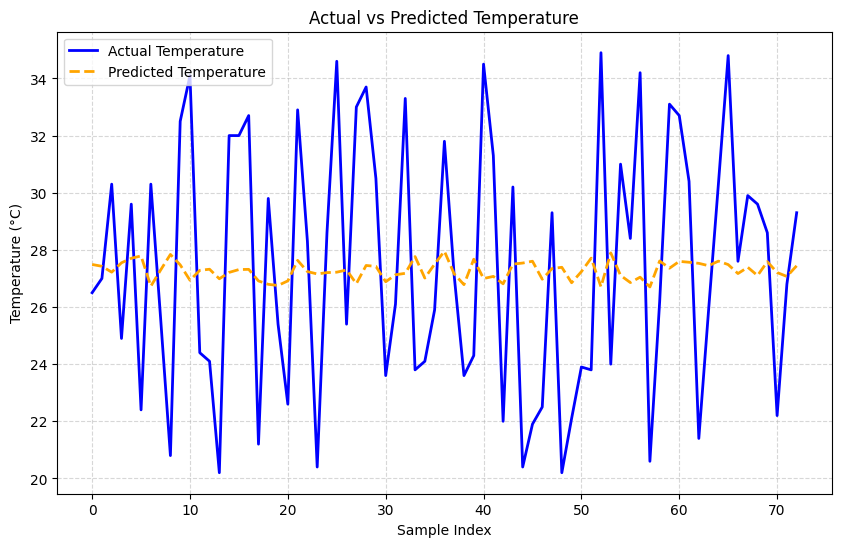

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

# Plot actual values
plt.plot(range(len(y_test)), y_test, label='Actual Temperature', color='blue', linewidth=2)

# Plot predicted values
plt.plot(range(len(y_pred)), y_pred, label='Predicted Temperature', color='orange', linestyle='--', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Save Cleaned Data**

In [ ]:
from google.colab import files

# Save cleaned DataFrame to CSV
df.to_csv('weather_cleaned.csv', index=False)

# Download the file
files.download('weather_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>